In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart_cleveland_upload.csv')
data.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,0,2,120,178,1,0,96,0,0.0,0,0,0,0
96,59,1,2,126,218,1,0,134,0,2.2,1,1,1,1
97,59,1,2,150,212,1,0,157,0,1.6,0,0,0,0
98,58,1,2,112,230,0,2,165,0,2.5,1,1,2,1


### Exploratory data analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age          297 non-null int64
sex          297 non-null int64
cp           297 non-null int64
trestbps     297 non-null int64
chol         297 non-null int64
fbs          297 non-null int64
restecg      297 non-null int64
thalach      297 non-null int64
exang        297 non-null int64
oldpeak      297 non-null float64
slope        297 non-null int64
ca           297 non-null int64
thal         297 non-null int64
condition    297 non-null int64
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


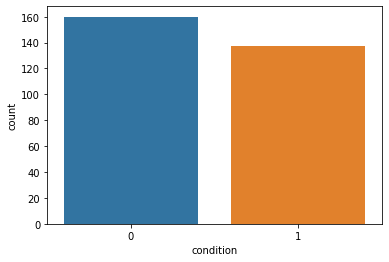

In [4]:
sns.countplot(x = 'condition', data = data)

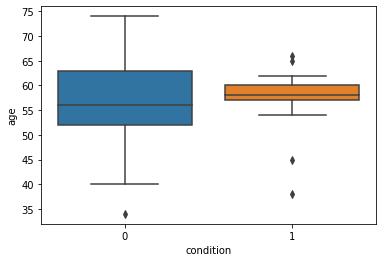

In [5]:
#Age aganist condition
sns.boxplot(x = 'condition', y = 'age', data = data.head(50))
plt.show()

#the plot shows no significnt difference between age and having heart disease.Here we see that the risk of 
#getting heart disease appears to be relatively low for under 40s with risk generally increasing with age and 
#peaking around the late 50s/early 60s'''

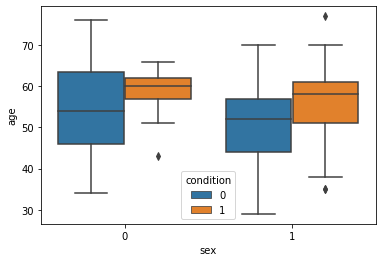

In [6]:
#SEX, condition  aganist AGE
sns.boxplot(x = 'sex' , y = 'age',hue = 'condition', data = data)
plt.show()

#from the boxplot, the female gender are less likely to have heart disease compared to the male gender of the same age

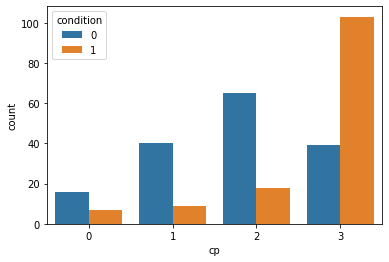

In [7]:
#chestpain levels

sns.countplot(x = 'cp', hue = 'condition', data = data)
plt.show()
#again it highlights that chest pain doesn’t necessarily mean you have heart disease.

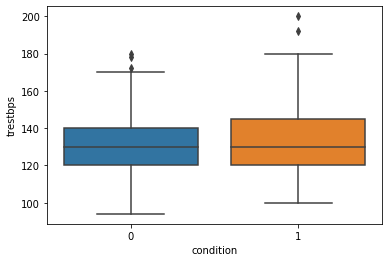

In [8]:
#Resting Blood Pressure Levels
sns.boxplot(x='condition', y= 'trestbps', data = data)
plt.show()

#Based on this plot, you would not expect ‘resting_bp’ to be a good predictor of heart disease because there are no discernible differences in resting blood pressure between the two groups.


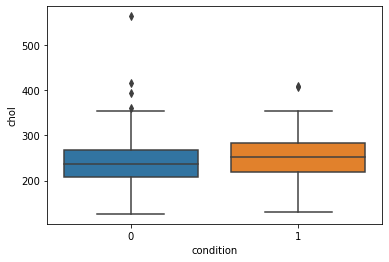

In [9]:
#cholestrol
sns.boxplot(x='condition', y= 'chol', data = data)
plt.show()

#there is no significant difference between the two groups. ‘cholesterol’ is unlikely to be a useful predictor of heart disease.

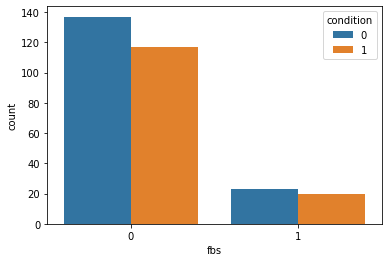

In [10]:
#Fasting Blood Sugar
sns.countplot(x='fbs', hue = 'condition', data = data)
plt.show()

#FRom the plot, I can assume that it is not a good predictoe of heart disease

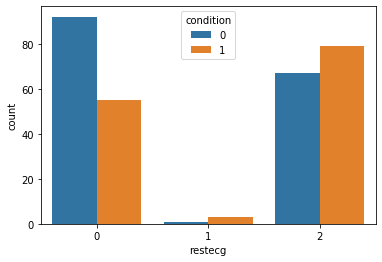

In [11]:
#Rest ECG
sns.countplot(x='restecg', hue = 'condition', data = data)
plt.show()

Here we can see that many patients had normal ECG results (‘0’, left two bars). A higher proportion of patients did not have heart disease (green) than those who did (red), which makes sense. A very small proportion of patients showed ST-T wave abnormality (‘1’, middle two bars) and there was little difference between the two groups though there was a slightly higher proportion of those that did have heart disease. Many patients exhibited probable or definite left ventricular hypertrophy by Estes’ criteria (‘2’, right two bars). Here a higher proportion of heart disease suffers had this result than non-suffers. Overall, ‘resting_ecg’ might show some predictive power, because non-suffers are more likely to have normal results and sufferers are more likely to have abnormal results (value ‘1’ or ‘2’).

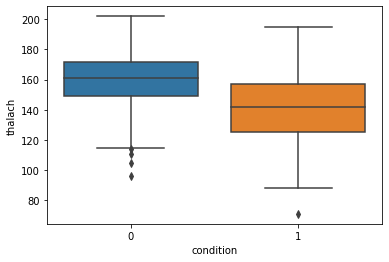

In [12]:
#Thallium test
sns.boxplot(x = 'condition', y= 'thalach', data = data)
plt.show()

As for predictive power, ‘max_heart_rate’ will probably have some use due to the significant difference in heart rates between the two groups.

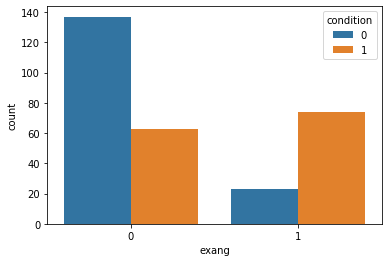

In [13]:
#Exercise Induced Angina
sns.countplot(x='exang', hue = 'condition', data=data)
plt.show()

Exercise_induced_angina should be a useful predictor because it is much more likely that non-sufferers will not have EIA than having it, but it is almost equally likely a heart disease suffer will have or not have EIA.

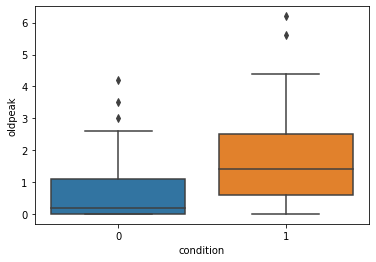

In [14]:
sns.boxplot(x = 'condition', y= 'oldpeak', data = data)
plt.show()

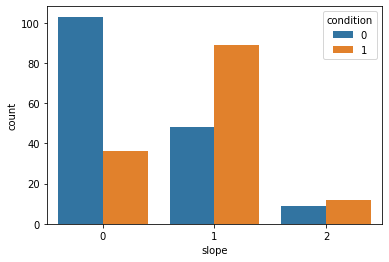

In [15]:
#Slope of ST Segment
sns.countplot(x='slope', hue = 'condition', data=data)
plt.show()

A low proportion of both groups have a value of ‘3’ and there isn’t much difference between those proportions. So if a patient has a ‘3’ it isn’t obvious if they will have heart disease or not. If they have a ‘1’ they will probably not have it and if they have a ‘2’ they probably will have it.

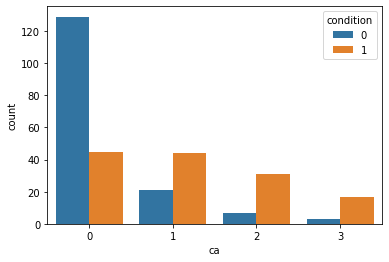

In [16]:
#Major Vessles Coloured by Fluoroscopy
sns.countplot(x='ca', hue = 'condition', data=data)
plt.show()

The heart disease sufferers (red) are roughly equally split between all levels. As for making predictions, ‘no_major_vessels’ is likely only going to be useful in determining a heart disease classification if no major vessels are seen (‘0’), because then they most likely don’t have heart disease.

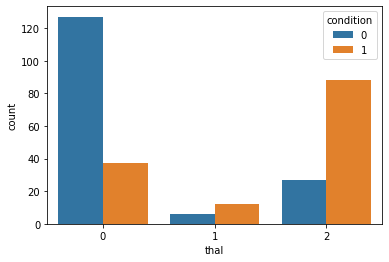

In [17]:
#Thallium test
sns.countplot(x='thal', hue = 'condition', data=data)
plt.show()

## PREDICTIVE MODELS

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = data.drop('condition', axis = 1)
y = data.loc[:,'condition']

In [20]:
x = pd.DataFrame(x, columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak',
                               'slope','ca','thal'])
y = pd.DataFrame(y, columns = ['condition'])

In [21]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, roc_auc_score, auc, roc_curve
import statsmodels.api as sm

In [23]:
model_lr = LogisticRegression(C=9.0)
model_lr.fit(x_train,y_train)

/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=9.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
train_pred = model_lr.predict(x_train)
print( accuracy_score(y_train, train_pred))
train_pred

0.8818565400843882


array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [25]:
test_pred = model_lr.predict(x_test)
print( accuracy_score(y_test, test_pred))
test_pred

0.7333333333333333


array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [26]:
confusion_matrix(y_train, train_pred)

array([[116,  12],
       [ 16,  93]])

In [27]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       128
           1       0.89      0.85      0.87       109

    accuracy                           0.88       237
   macro avg       0.88      0.88      0.88       237
weighted avg       0.88      0.88      0.88       237



Accuracy is the number of correctly predicted values (TP + TN) divided by all outcomes (TP + FP + FN + TN).
Precision measures what proportion of predicted positives are actually positives ((TP) / (TP + FP)).
Sensitivity, also known as recall or the true positive rate (TPR) which measures what proportion of actual positives are correctly classified as positives ((TP) / (TP + FN)).
Specificity, also known as selectivity or the true negative rate (TNR). This is the opposite of sensitivity as it measures what proportion of actual negatives are correctly classified as negatives ((TN) / (TN + FP)).

In [28]:
#USINS STATS INSTEAD OF SCIKIT-LEARN
model_lr2 = sm.Logit(y_train,x_train)

result =model_lr2.fit(method= 'newton')

Optimization terminated successfully.
         Current function value: 0.301285
         Iterations 8


In [29]:
result.params
train_pred =result.predict(x_train)
test_pred = result.predict(x_test)
result.pred_table()

array([[117.,  11.],
       [ 16.,  93.]])

In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              condition   No. Observations:                  237
Model:                          Logit   Df Residuals:                      224
Method:                           MLE   Df Model:                           12
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:                  0.5633
Time:                        00:51:33   Log-Likelihood:                -71.404
converged:                       True   LL-Null:                       -163.51
Covariance Type:            nonrobust   LLR p-value:                 5.806e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0426      0.025     -1.706      0.088      -0.092       0.006
sex            1.8278      0.580      3.150      0.002       0.690       2.965
cp             0.2814      0.208      1.353      0.176      -0.126       0.689
trestbps       0.0285      0.013      2.211      0.027       0.003       0.054
chol           0.0063      0.004      1.487      0.137      -0.002       0.015
fbs           -1.1196      0.660     -1.696      0.090      -2.413       0.174
restecg        0.2944      0.228      1.290      0.197      -0.153       0.742
thalach       -0.0496      0.010     -4.762      0.000      -0.070      -0.029
exang          0.6804      0.504      1.350      0.177      -0.307       1.668
oldpeak        0.4259      0.275      1.551      0.121      -0.112       0.964
slope          0.4002      0.430      0.930      0.352      -0.443       1.243
ca             1.4062      0.343      4.104      0.000       0.735       2.078
thal           0.8251      0.243      3.393      0.001       0.349       1.302
==============================================================================
"""

The summary of the output of the logistic regression model shows that not all predictors are helpful in predicting the response. Of those that are useful ( with a p-value of 0.05 or less), all but one are positive. This means that as a patients value of those predictors increases their chance of having heart disease increases.
In full:
- sex: males (‘1’) more likely than females (‘0’) to have heart disease
- chest_pain: patients with less severe chest pain (e.g. ‘4’) are at the most risk of having heart disease
- fasting_blood_sugar: patients with fasting blood sugar levels below 120 mg/dL (‘0’) have a higher probability of having heart disease than patients with levels above 120 mg/dL (‘1’)
- exercise_induced_angina: patients with EIA (‘1’) more likely to have heart disease than those without (‘0’)
- no_major_vessels: patients with a higher number of visible major vessels (e.g. ‘3’) are at the most risk of having heart disease
- thallium: patients with reversible defects (‘3’) are at the most risk of having heart disease

###### Using varibles that affect the condition

Remember when we visualized the data, there were some variables that had very low prdeictive power to predict if a patient has heart disease or not. Here, we will train a model only with the varables that are most likely to affect the condition.

In [31]:
vip_x = data.drop('condition', axis = 1)
vip_y = data.loc[:,'condition']
vip_x = pd.DataFrame(x, columns = ['sex','cp','fbs','restecg','exang','ca','thal'])
vip_y = pd.DataFrame(y, columns = ['condition'])

In [32]:
x_train, x_test,y_train, y_test = train_test_split(vip_x,vip_y, test_size = 0.2, random_state = 42)

In [33]:
model2_lr = LogisticRegression(C=9.0)
model2_lr.fit(x_train,y_train)

/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=9.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
train_pred2 = model2_lr.predict(x_train)
print( accuracy_score(y_train, train_pred2))
train_pred2

0.8523206751054853


array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [35]:
test_pred2 = model2_lr.predict(x_test)
print( accuracy_score(y_test, test_pred2))
test_pred2

0.8


array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [36]:
confusion_matrix(y_train, train_pred2)

array([[113,  15],
       [ 20,  89]])

In [37]:
print(classification_report(y_train, train_pred2))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       128
           1       0.86      0.82      0.84       109

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237



Here we see that this model is actually worse across all metrics and was particularly much worse at identifying true positives.

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier()
model_rf.fit(x_train, y_train)
train_pred3= model_rf.predict(x_train)
test_pred3= model_rf.predict(x_test)
print(accuracy_score(y_train, train_pred3))
print(accuracy_score(y_test, test_pred3))

0.9240506329113924
0.8166666666666667


/home/betty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/betty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### Decision Tree

In [39]:
from sklearn import tree

In [40]:
model_dt = tree.DecisionTreeClassifier(criterion = 'gini')
model_dt.fit(x_train,y_train)
model_dt.score(x_train,y_train)
train_pred4 = model_dt.predict(x_train)
test_pred4 = model_dt.predict(x_test)

In [41]:
print(accuracy_score(y_train,train_pred4))
print(accuracy_score(y_test, test_pred4))

0.9240506329113924
0.7666666666666667


### KNN

In [42]:
from math import sqrt
def euclidean_distance(row1,row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [43]:
row0 = data[0]
for row in data:
    distance =euclidean_distance(row0,row)
    print(distance)

KeyError: 0